<a href="https://colab.research.google.com/github/E-girgen/Thesis-Data-Science-Society/blob/main/MNB_cleaned_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/Colab Notebooks"

Mounted at /content/drive
/content/drive/MyDrive


In [ ]:
nd = pd.read_csv("cleaned_tweets.csv")



In [ ]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder

In [ ]:
import seaborn as sns
import re
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
label_encoder = LabelEncoder()
nd['Category'] = label_encoder.fit_transform(nd['Category'])
label_encodings = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_encodings)

{'anger': 0, 'fear': 1, 'joy': 2, 'love': 3, 'neutral': 4, 'sadness': 5}


Preprocessed without SMOTE

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 1 - Nauwkeurigheid: 0.36, Precisie: 0.16645045712873732, Recall: 0.19483137829912023, F1-Score: 0.16098290598290596
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.25      0.12      0.17        16
           1       0.00      0.00      0.00         7
           2       0.38      0.82      0.52        33
           3       0.00      0.00      0.00         3
           4       0.37      0.23      0.28        31
           5       0.00      0.00      0.00        10

    accuracy                           0.36       100
   macro avg       0.17      0.19      0.16       100
weighted avg       0.28      0.36      0.28       100



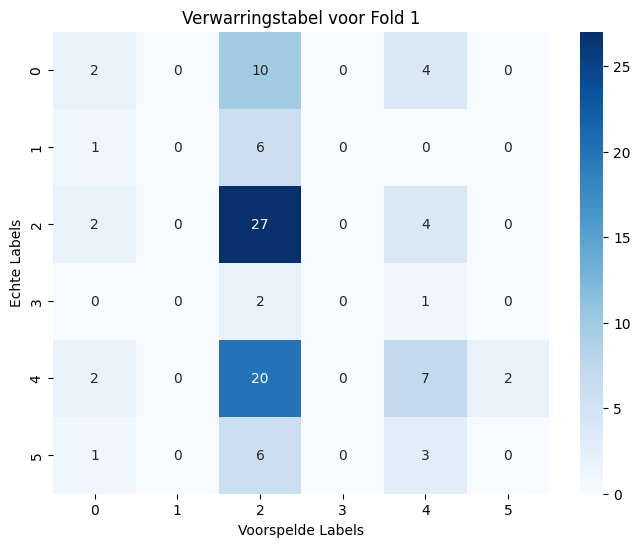

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 2 - Nauwkeurigheid: 0.39, Precisie: 0.23129466162253046, Recall: 0.21328018386841918, F1-Score: 0.2128058408767569
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.46      0.35      0.40        17
           1       0.00      0.00      0.00         1
           2       0.43      0.62      0.50        42
           3       0.00      0.00      0.00         1
           4       0.30      0.23      0.26        26
           5       0.20      0.08      0.11        13

    accuracy                           0.39       100
   macro avg       0.23      0.21      0.21       100
weighted avg       0.36      0.39      0.36       100



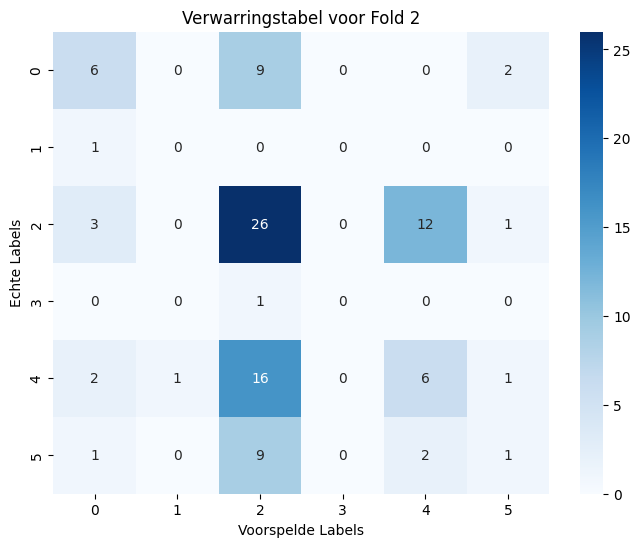

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 3 - Nauwkeurigheid: 0.41, Precisie: 0.22622498274672187, Recall: 0.23073370931427195, F1-Score: 0.21917368446735344
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.40      0.24      0.30        17
           1       0.00      0.00      0.00         6
           2       0.47      0.72      0.57        39
           3       0.00      0.00      0.00         3
           4       0.35      0.35      0.35        23
           5       0.14      0.08      0.11        12

    accuracy                           0.41       100
   macro avg       0.23      0.23      0.22       100
weighted avg       0.35      0.41      0.36       100



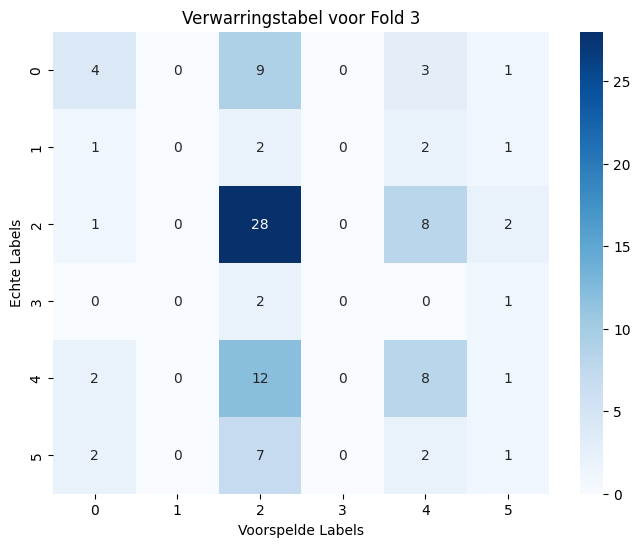

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 4 - Nauwkeurigheid: 0.41, Precisie: 0.17554492291334398, Recall: 0.19722222222222222, F1-Score: 0.17694098755519874
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.20      0.13      0.16        15
           1       0.00      0.00      0.00         8
           2       0.48      0.80      0.60        40
           3       0.00      0.00      0.00         5
           4       0.37      0.25      0.30        28
           5       0.00      0.00      0.00         4

    accuracy                           0.41       100
   macro avg       0.18      0.20      0.18       100
weighted avg       0.33      0.41      0.35       100



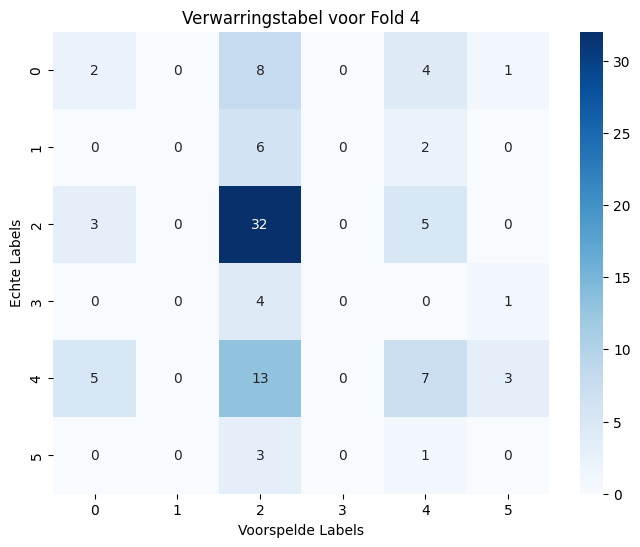

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 5 - Nauwkeurigheid: 0.42, Precisie: 0.19051600573339703, Recall: 0.2018849206349206, F1-Score: 0.19070404465941992
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.36      0.33      0.34        15
           1       0.00      0.00      0.00         7
           2       0.48      0.69      0.56        48
           3       0.00      0.00      0.00         5
           4       0.31      0.19      0.24        21
           5       0.00      0.00      0.00         4

    accuracy                           0.42       100
   macro avg       0.19      0.20      0.19       100
weighted avg       0.35      0.42      0.37       100



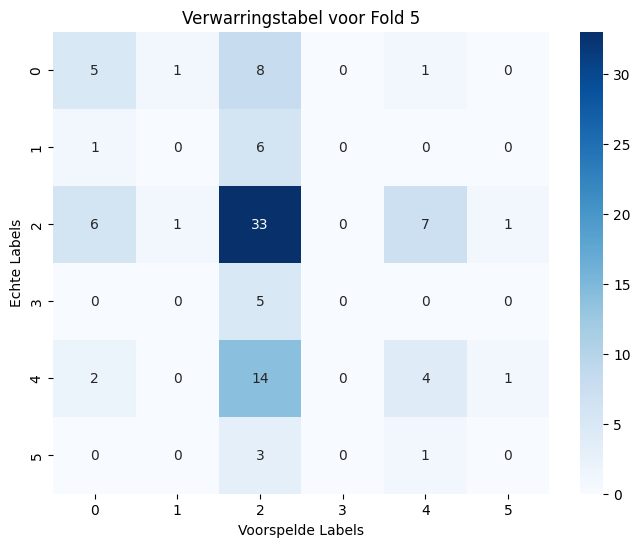

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 6 - Nauwkeurigheid: 0.44, Precisie: 0.19605994152046782, Recall: 0.23307022084195997, F1-Score: 0.2120159932659933
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.31      0.31      0.31        16
           1       0.00      0.00      0.00         5
           2       0.54      0.74      0.63        42
           3       0.00      0.00      0.00         4
           4       0.32      0.35      0.33        23
           5       0.00      0.00      0.00        10

    accuracy                           0.44       100
   macro avg       0.20      0.23      0.21       100
weighted avg       0.35      0.44      0.39       100



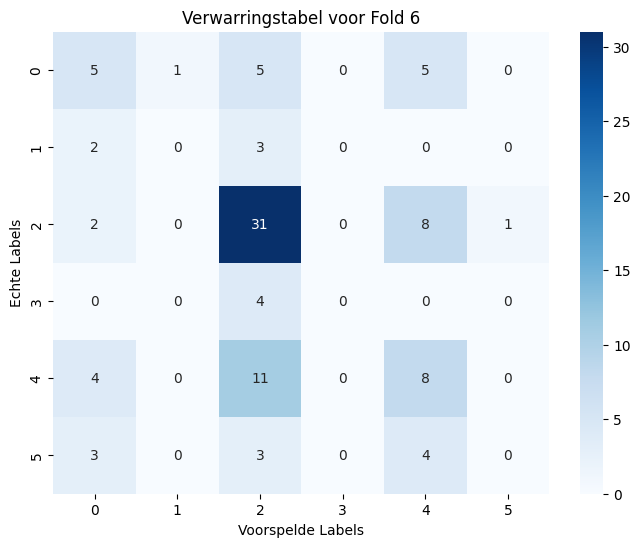

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 7 - Nauwkeurigheid: 0.39, Precisie: 0.17961876832844573, Recall: 0.17026451809060505, F1-Score: 0.1634589947089947
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.50      0.23      0.31        22
           1       0.00      0.00      0.00         3
           2       0.53      0.72      0.61        46
           3       0.00      0.00      0.00         9
           4       0.05      0.08      0.06        13
           5       0.00      0.00      0.00         7

    accuracy                           0.39       100
   macro avg       0.18      0.17      0.16       100
weighted avg       0.36      0.39      0.36       100



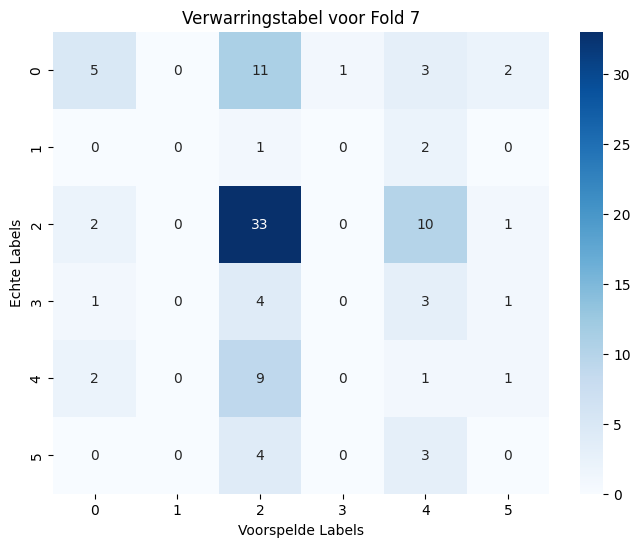

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 8 - Nauwkeurigheid: 0.36, Precisie: 0.17719116632160112, Recall: 0.1804567725620357, F1-Score: 0.15753968253968254
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.50      0.17      0.25        24
           1       0.00      0.00      0.00         4
           2       0.48      0.81      0.60        37
           3       0.00      0.00      0.00         5
           4       0.09      0.11      0.10        19
           5       0.00      0.00      0.00        11

    accuracy                           0.36       100
   macro avg       0.18      0.18      0.16       100
weighted avg       0.31      0.36      0.30       100



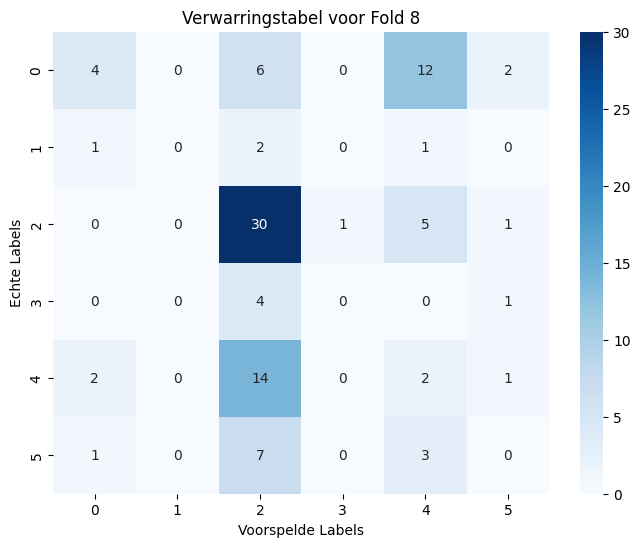

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 9 - Nauwkeurigheid: 0.36, Precisie: 0.17353414795870037, Recall: 0.1962406015037594, F1-Score: 0.1685777551381078
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.44      0.20      0.28        20
           1       0.00      0.00      0.00         5
           2       0.42      0.76      0.54        38
           3       0.00      0.00      0.00         6
           4       0.18      0.21      0.19        14
           5       0.00      0.00      0.00        17

    accuracy                           0.36       100
   macro avg       0.17      0.20      0.17       100
weighted avg       0.27      0.36      0.29       100



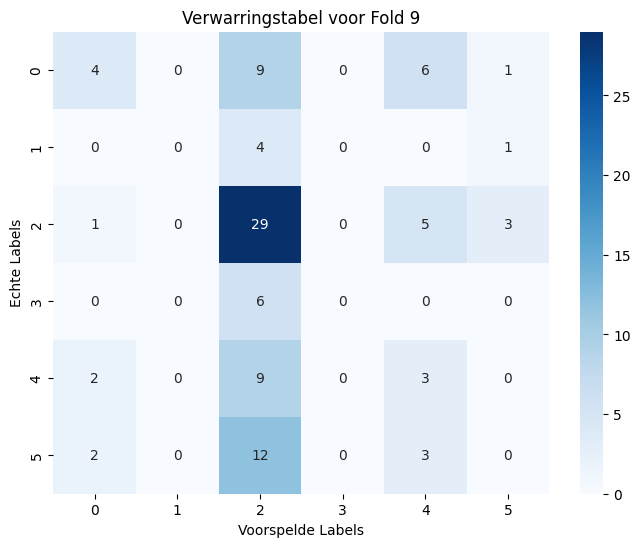

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:13

Fold 10 - Nauwkeurigheid: 0.39, Precisie: 0.19655870445344129, Recall: 0.2081807081807082, F1-Score: 0.17614673497026437
Classificatie Rapport:
              precision    recall  f1-score   support

           0       0.40      0.15      0.22        26
           1       0.00      0.00      0.00         5
           2       0.39      0.86      0.54        35
           3       0.00      0.00      0.00         3
           4       0.38      0.24      0.29        21
           5       0.00      0.00      0.00        10

    accuracy                           0.39       100
   macro avg       0.20      0.21      0.18       100
weighted avg       0.32      0.39      0.31       100



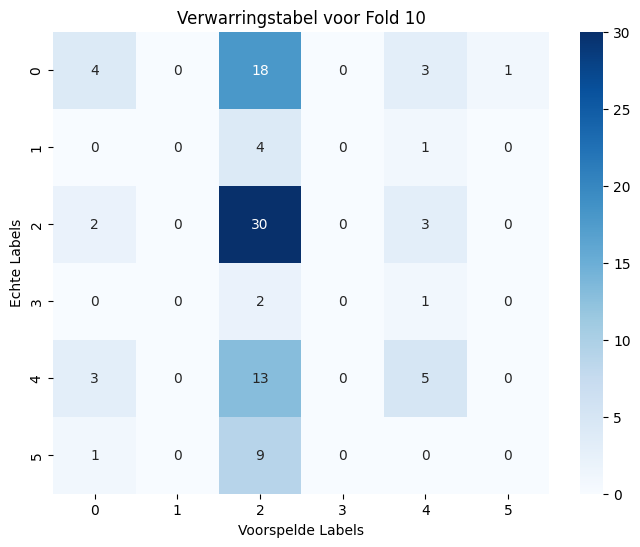


Gemiddelde scores over alle folds - Nauwkeurigheid: 0.39299999999999996, Precisie: 0.19129937587273874, Recall: 0.20261652355180226, F1-Score: 0.18383466241646776
Beste parameters gevonden via GridSearchCV:
{'alpha': 0.1}


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder

# Initialiseer een TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transformeer de tekst naar vectoren
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialiseer een LabelEncoder
label_encoder = LabelEncoder()

# Encodeer de categorieën naar numerieke waarden
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Definieer de parametergrid voor GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Initialiseer het Naive Bayes-model
mnb = MultinomialNB()

# Initialiseer GridSearchCV met 10-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, scoring='f1_macro', cv=kf)

# Lijsten om resultaten per fold op te slaan
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over de folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
    y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

    # Voer GridSearchCV uit om de beste parameters te vinden op de trainingsdata van deze fold
    grid_search.fit(X_train, y_train)

    # Haal de beste estimator (model) op met de beste parameters
    best_estimator = grid_search.best_estimator_

    # Voorspel de categorieën op de testset met het beste model
    y_pred = best_estimator.predict(X_test)

    # Decodeer de voorspelde labels terug naar de originele tekstuele categorieën
    y_test_decoded = label_encoder.inverse_transform(y_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    # Bereken en sla de metingen op
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

    print(f"Fold {fold + 1} - Nauwkeurigheid: {accuracy}, Precisie: {precision}, Recall: {recall}, F1-Score: {f1}")

    # Druk het classificatie rapport af
    print("Classificatie Rapport:")
    print(classification_report(y_test_decoded, y_pred_decoded))

    # Plot de verwarringstabel als een heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Voorspelde Labels')
    plt.ylabel('Echte Labels')
    plt.title(f'Verwarringstabel voor Fold {fold + 1}')
    plt.show()

# Gemiddelde scores over alle folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nGemiddelde scores over alle folds - Nauwkeurigheid: {avg_accuracy}, Precisie: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")
print("Beste parameters gevonden via GridSearchCV:")
print(grid_search.best_params_)


With SMOTE

Fold 1 - Nauwkeurigheid: 0.31, Precisie: 0.1697144371562976, Recall: 0.16990469208211145, F1-Score: 0.16555555555555557
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.22      0.12      0.16        16
        fear       0.00      0.00      0.00         7
         joy       0.49      0.64      0.55        33
        love       0.00      0.00      0.00         3
     neutral       0.31      0.26      0.28        31
     sadness       0.00      0.00      0.00        10

    accuracy                           0.31       100
   macro avg       0.17      0.17      0.17       100
weighted avg       0.29      0.31      0.29       100



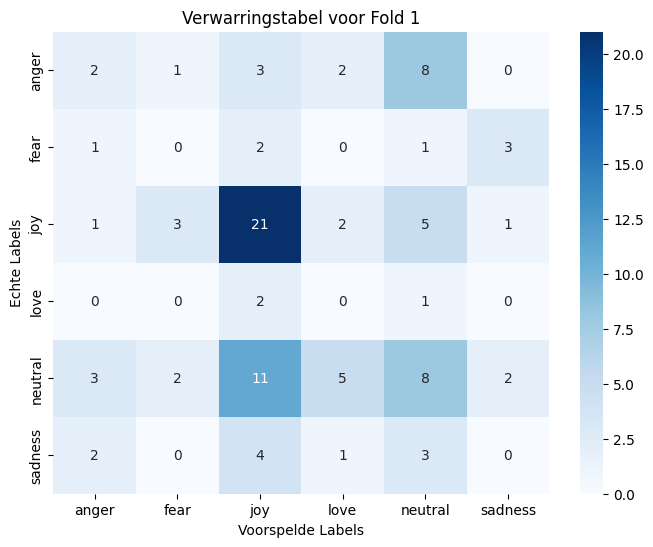

Fold 2 - Nauwkeurigheid: 0.35, Precisie: 0.2471957671957672, Recall: 0.2233893557422969, F1-Score: 0.23278867102396514
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.39      0.41      0.40        17
        fear       0.00      0.00      0.00         1
         joy       0.60      0.43      0.50        42
        love       0.00      0.00      0.00         1
     neutral       0.28      0.27      0.27        26
     sadness       0.21      0.23      0.22        13

    accuracy                           0.35       100
   macro avg       0.25      0.22      0.23       100
weighted avg       0.42      0.35      0.38       100



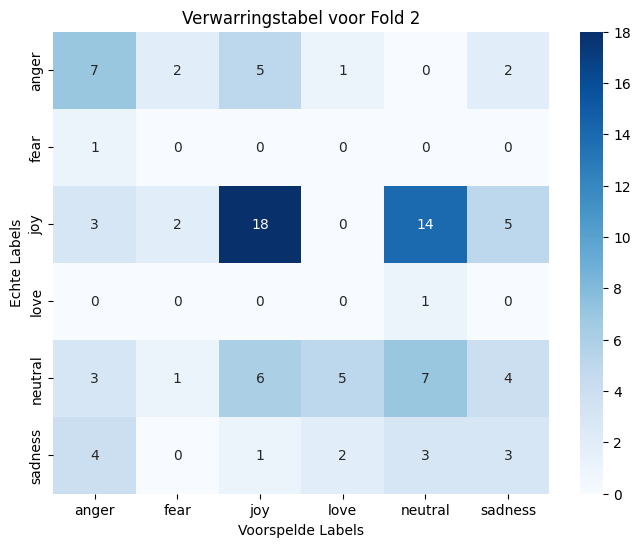

Fold 3 - Nauwkeurigheid: 0.3, Precisie: 0.2617174492174492, Recall: 0.2940001530154983, F1-Score: 0.25869474588751923
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.33      0.24      0.28        17
        fear       0.14      0.17      0.15         6
         joy       0.46      0.31      0.37        39
        love       0.09      0.33      0.14         3
     neutral       0.29      0.30      0.30        23
     sadness       0.25      0.42      0.31        12

    accuracy                           0.30       100
   macro avg       0.26      0.29      0.26       100
weighted avg       0.35      0.30      0.31       100



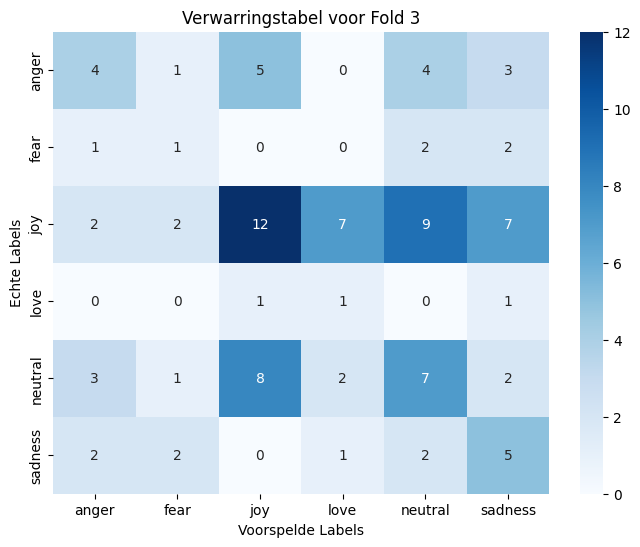

Fold 4 - Nauwkeurigheid: 0.34, Precisie: 0.263014763014763, Recall: 0.3128968253968254, F1-Score: 0.2710671681259917
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.09      0.07      0.08        15
        fear       0.17      0.12      0.14         8
         joy       0.50      0.50      0.50        40
        love       0.33      0.40      0.36         5
     neutral       0.33      0.29      0.31        28
     sadness       0.15      0.50      0.24         4

    accuracy                           0.34       100
   macro avg       0.26      0.31      0.27       100
weighted avg       0.34      0.34      0.34       100



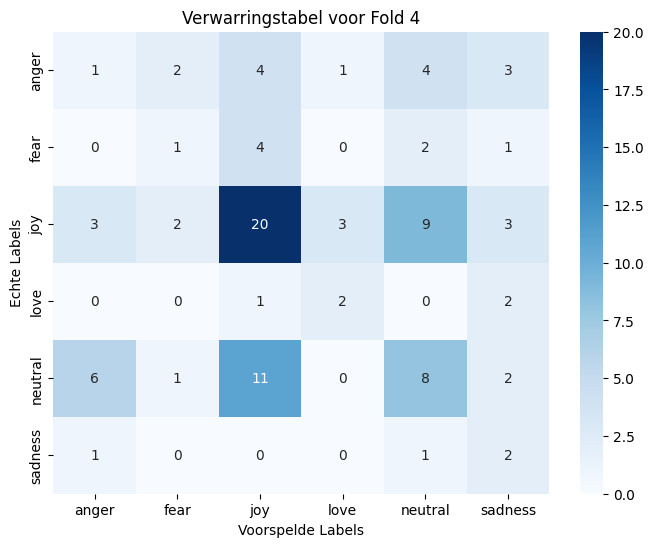

Fold 5 - Nauwkeurigheid: 0.39, Precisie: 0.26533454290807235, Recall: 0.29712301587301587, F1-Score: 0.2661172161172161
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.29      0.33      0.31        15
        fear       0.17      0.14      0.15         7
         joy       0.52      0.52      0.52        48
        love       0.00      0.00      0.00         5
     neutral       0.43      0.29      0.34        21
     sadness       0.18      0.50      0.27         4

    accuracy                           0.39       100
   macro avg       0.27      0.30      0.27       100
weighted avg       0.40      0.39      0.39       100



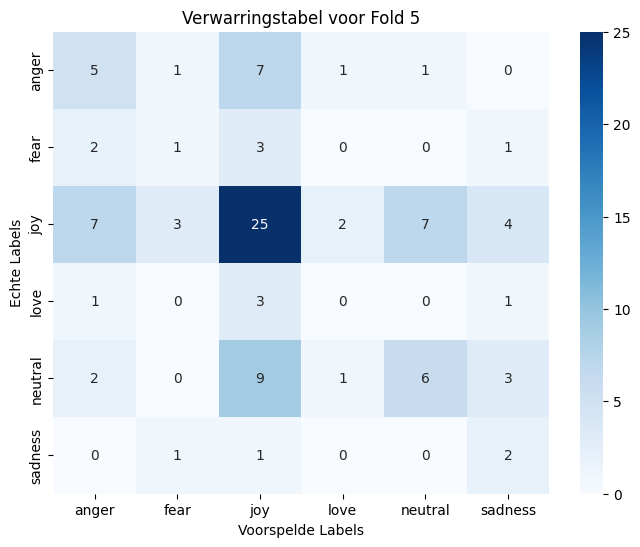

Fold 6 - Nauwkeurigheid: 0.36, Precisie: 0.28405797101449276, Recall: 0.28405797101449276, F1-Score: 0.2818823688388906
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.20      0.25      0.22        16
        fear       0.25      0.20      0.22         5
         joy       0.58      0.50      0.54        42
        love       0.20      0.25      0.22         4
     neutral       0.30      0.30      0.30        23
     sadness       0.17      0.20      0.18        10

    accuracy                           0.36       100
   macro avg       0.28      0.28      0.28       100
weighted avg       0.38      0.36      0.37       100



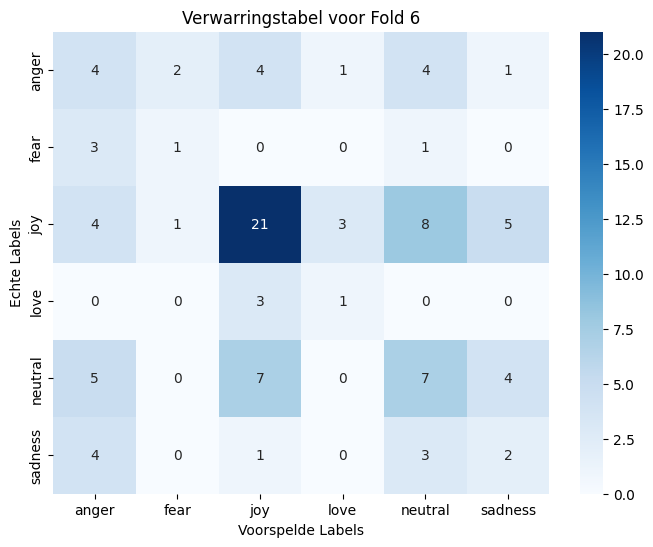

Fold 7 - Nauwkeurigheid: 0.28, Precisie: 0.22784745447788926, Recall: 0.2266208027077592, F1-Score: 0.2160675381263617
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.42      0.23      0.29        22
        fear       0.20      0.33      0.25         3
         joy       0.46      0.39      0.42        46
        love       0.12      0.11      0.12         9
     neutral       0.09      0.15      0.11        13
     sadness       0.08      0.14      0.10         7

    accuracy                           0.28       100
   macro avg       0.23      0.23      0.22       100
weighted avg       0.34      0.28      0.30       100



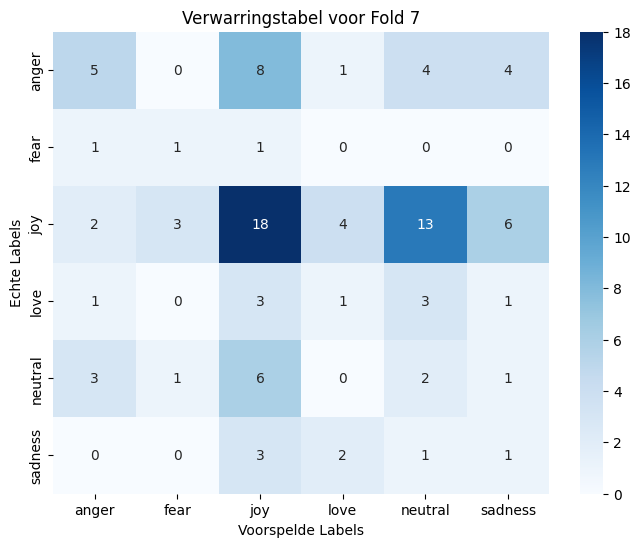

Fold 8 - Nauwkeurigheid: 0.34, Precisie: 0.2412698412698413, Recall: 0.2731610198715462, F1-Score: 0.23772227510820387
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.33      0.12      0.18        24
        fear       0.20      0.50      0.29         4
         joy       0.55      0.62      0.58        37
        love       0.00      0.00      0.00         5
     neutral       0.17      0.21      0.19        19
     sadness       0.20      0.18      0.19        11

    accuracy                           0.34       100
   macro avg       0.24      0.27      0.24       100
weighted avg       0.34      0.34      0.33       100



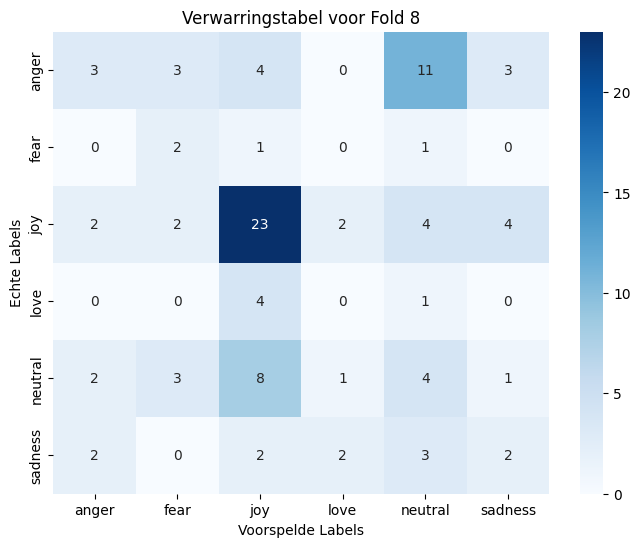

Fold 9 - Nauwkeurigheid: 0.38, Precisie: 0.3237812911725955, Recall: 0.3275861221681655, F1-Score: 0.31624741624741626
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.50      0.30      0.37        20
        fear       0.33      0.40      0.36         5
         joy       0.50      0.55      0.53        38
        love       0.17      0.17      0.17         6
     neutral       0.26      0.43      0.32        14
     sadness       0.18      0.12      0.14        17

    accuracy                           0.38       100
   macro avg       0.32      0.33      0.32       100
weighted avg       0.38      0.38      0.37       100



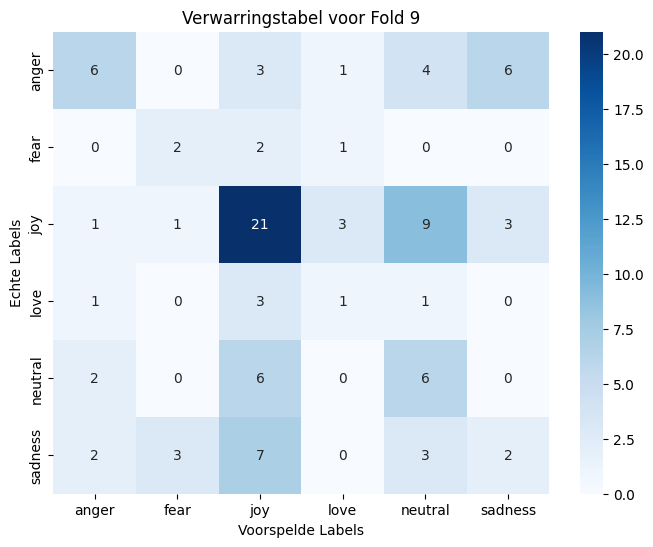

Fold 10 - Nauwkeurigheid: 0.29, Precisie: 0.1948107448107448, Recall: 0.2319291819291819, F1-Score: 0.20405982905982903
Classificatie Rapport:
              precision    recall  f1-score   support

       anger       0.23      0.12      0.15        26
        fear       0.14      0.20      0.17         5
         joy       0.43      0.60      0.50        35
        love       0.20      0.33      0.25         3
     neutral       0.17      0.14      0.15        21
     sadness       0.00      0.00      0.00        10

    accuracy                           0.29       100
   macro avg       0.19      0.23      0.20       100
weighted avg       0.26      0.29      0.26       100



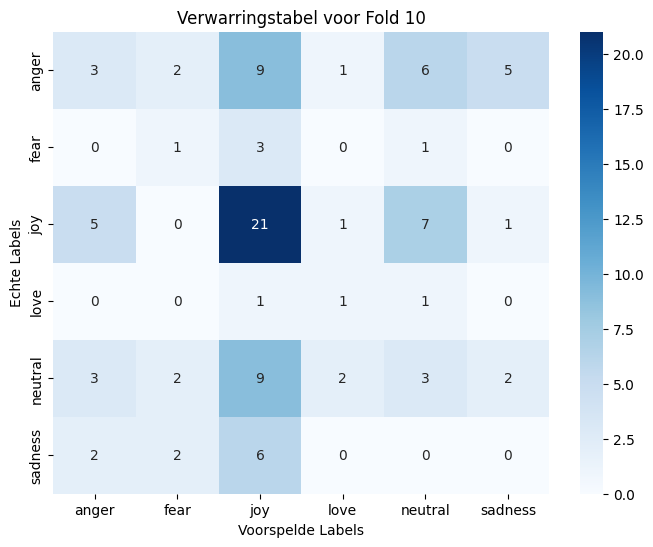


Gemiddelde scores over alle folds - Nauwkeurigheid: 0.33399999999999996, Precisie: 0.24787442622379136, Recall: 0.26406691398008936, F1-Score: 0.24502027840909496
Beste parameters gevonden via GridSearchCV:
{'alpha': 0.1}


In [ ]:
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Initialiseer een TfidfVectorizer
vectorizer = TfidfVectorizer()

# Transformeer de tekst naar vectoren
X_tfidf = vectorizer.fit_transform(nd['Text'])
y_labels = nd['Category']

# Initialiseer een LabelEncoder
label_encoder = LabelEncoder()

# Encodeer de categorieën naar numerieke waarden
y_labels_encoded = label_encoder.fit_transform(y_labels)

# Definieer de parametergrid voor GridSearchCV
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Initialiseer het Naive Bayes-model
mnb = MultinomialNB()

# Initialiseer GridSearchCV met 10-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)
grid_search = GridSearchCV(estimator=mnb, param_grid=param_grid, scoring='f1_macro', cv=kf)

# Initialiseer SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=2022)

# Lijsten om resultaten per fold op te slaan
accuracies = []
precisions = []
recalls = []
f1_scores = []
conf_matrices = []

# Loop over de folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
    y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

    # Pas SMOTE toe op de trainingsdata van deze fold
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Voer GridSearchCV uit om de beste parameters te vinden op de resampled trainingsdata van deze fold
    grid_search.fit(X_train_resampled, y_train_resampled)

    # Haal de beste estimator (model) op met de beste parameters
    best_estimator = grid_search.best_estimator_

    # Voorspel de categorieën op de testset met het beste model
    y_pred = best_estimator.predict(X_test)

    # Decodeer de voorspelde labels terug naar de originele tekstuele categorieën
    y_test_decoded = label_encoder.inverse_transform(y_test)
    y_pred_decoded = label_encoder.inverse_transform(y_pred)

    # Bereken en sla de metingen op
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    conf_matrices.append(conf_matrix)

    print(f"Fold {fold + 1} - Nauwkeurigheid: {accuracy}, Precisie: {precision}, Recall: {recall}, F1-Score: {f1}")

    # Druk het classificatie rapport af
    print("Classificatie Rapport:")
    print(classification_report(y_test_decoded, y_pred_decoded))

    # Plot de verwarringstabel als een heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.xlabel('Voorspelde Labels')
    plt.ylabel('Echte Labels')
    plt.title(f'Verwarringstabel voor Fold {fold + 1}')
    plt.show()

# Gemiddelde scores over alle folds
avg_accuracy = sum(accuracies) / len(accuracies)
avg_precision = sum(precisions) / len(precisions)
avg_recall = sum(recalls) / len(recalls)
avg_f1 = sum(f1_scores) / len(f1_scores)

print(f"\nGemiddelde scores over alle folds - Nauwkeurigheid: {avg_accuracy}, Precisie: {avg_precision}, Recall: {avg_recall}, F1-Score: {avg_f1}")
print("Beste parameters gevonden via GridSearchCV:")
print(grid_search.best_params_)


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Initialiseer K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Lijsten om resultaten per fold op te slaan
accuracies = []

# Loop over de folds
for train_idx, test_idx in kf.split(X_tfidf):
    X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
    y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

    # Train het model op de trainingsdata
    mnb.fit(X_train, y_train)

    # Voorspel de categorieën op de testset
    y_pred = mnb.predict(X_test)

    # Bereken de nauwkeurigheid en sla op
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Gemiddelde nauwkeurigheid over alle folds
avg_accuracy = np.mean(accuracies)

print(f"Gemiddelde Nauwkeurigheid over alle folds: {avg_accuracy}")


Gemiddelde Nauwkeurigheid over alle folds: 0.39299999999999996


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Initialiseer K-Fold cross-validator
kf = KFold(n_splits=10, shuffle=True, random_state=2022)

# Specificeer de gewenste fold (bijvoorbeeld de 10e)
test_fold_number = 10

# Lijst om resultaten op te slaan
accuracies = []

# Loop over de folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X_tfidf)):
    if fold == test_fold_number - 1:  # Indexen zijn 0-gebaseerd, daarom -1
        X_train, X_test = X_tfidf[train_idx], X_tfidf[test_idx]
        y_train, y_test = y_labels_encoded[train_idx], y_labels_encoded[test_idx]

        # Train het model op de trainingsdata
        mnb.fit(X_train, y_train)

        # Voorspel de categorieën op de testset
        y_pred = mnb.predict(X_test)

        # Bereken de nauwkeurigheid en sla op
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

# Gemiddelde nauwkeurigheid over alle folds
avg_accuracy = np.mean(accuracies)

print(f"Gemiddelde Nauwkeurigheid over 9 folds, getest op de 10e fold: {avg_accuracy}")


Gemiddelde Nauwkeurigheid over 9 folds, getest op de 10e fold: 0.39


In [ ]:
example_sentence = "ik ben onwijs boos"
example_sentence_tfidf = vectorizer.transform([example_sentence])
example_pred = mnb.predict(example_sentence_tfidf)

print(f"Voorspelde emotie voor de voorbeeldzin: {example_pred[0]}")
